# Users Vs Bots

 # Shape of the Dataset


Rows: 5,874

Columns: 60



# Target Column
Name: target

Classes:

0: Real User (2,937 entries)

1: Bot (2,937 entries)

Distribution: Perfectly balanced



In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')   

In [6]:
df = pd.read_csv(r'C:\Users\Shivam.Singhal\Downloads\archive (7)\bots_vs_users.csv')


In [7]:
df.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [8]:
df.shape

(5874, 60)

In [9]:
# Map target to readable labels
df['target_label'] = df['target'].map({0: 'Real User', 1: 'Bot'})

In [10]:
# -------------------- STEP 1: OVERVIEW --------------------
print("Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes.value_counts())
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nTarget Distribution:\n", df['target'].value_counts())

Shape: (5874, 61)

Column Types:
 object     46
float64    14
int64       1
Name: count, dtype: int64

Missing Values:
 avg_text_length           4483
reposts_ratio             4483
ads_ratio                 4483
avg_views                 4483
posting_frequency_days    4483
phone_numbers_ratio       4483
avg_text_uniqueness       4483
attachments_ratio         4483
avg_comments              4483
hashtags_ratio            4483
dtype: int64

Target Distribution:
 target
1    2937
0    2937
Name: count, dtype: int64


In [11]:
# -------------------- STEP 2: HANDLE MISSING VALUES --------------------
# Separate columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [12]:

# Fill numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [13]:
# Fill categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
# Confirm no missing values remain
print("\nMissing values after cleaning:\n", df.isnull().sum().sum())


Missing values after cleaning:
 0


In [16]:
# -------------------- STEP 3: ENCODE CATEGORICAL VARIABLES --------------------
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
# -------------------- STEP 4: NUMERICAL SUMMARY --------------------
print("\nNumerical Summary:\n", df[numeric_cols].describe())



Numerical Summary:
             target  posts_count    avg_likes  links_ratio  hashtags_ratio  \
count  5874.000000  5874.000000  5874.000000  5874.000000      5874.00000   
mean      0.500000    19.675349    10.430424     0.113371         0.07224   
std       0.500043     2.139757    21.033882     0.101506         0.09939   
min       0.000000     1.000000     0.000000     0.000000         0.00000   
25%       0.000000    20.000000     7.600000     0.100000         0.05000   
50%       0.500000    20.000000     7.600000     0.100000         0.05000   
75%       1.000000    20.000000     7.600000     0.100000         0.05000   
max       1.000000    20.000000   894.900000     1.000000         1.00000   

       avg_keywords  avg_text_length  attachments_ratio  avg_comments  \
count   5874.000000      5874.000000        5874.000000   5874.000000   
mean       4.425528       333.383977           0.937200      0.144644   
std        5.787704       381.884954           0.085877      1.225

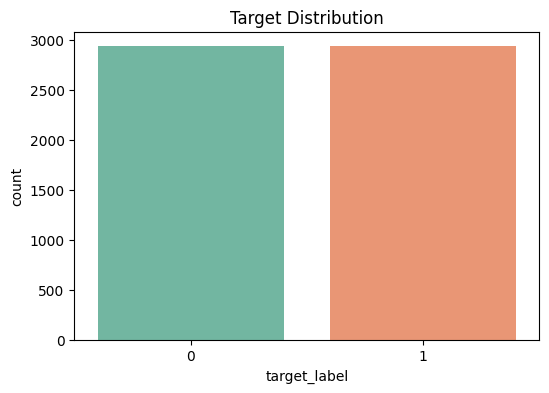

In [18]:

# 1. Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target_label', data=df, palette='Set2')
plt.title("Target Distribution")
plt.show()

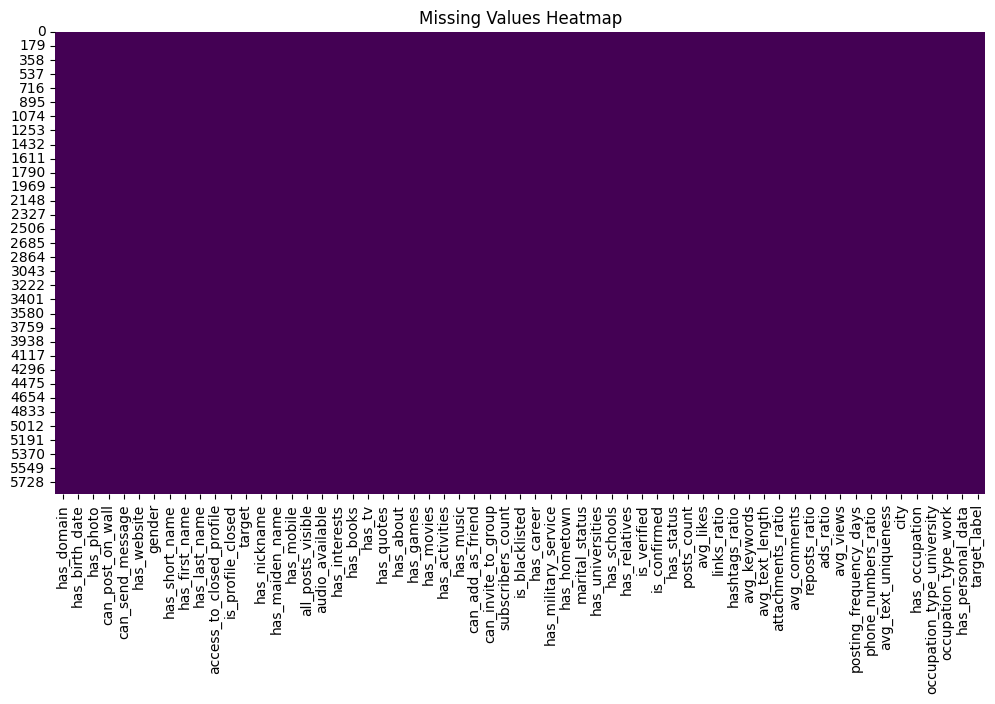

In [19]:
# 2. Missing Value Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

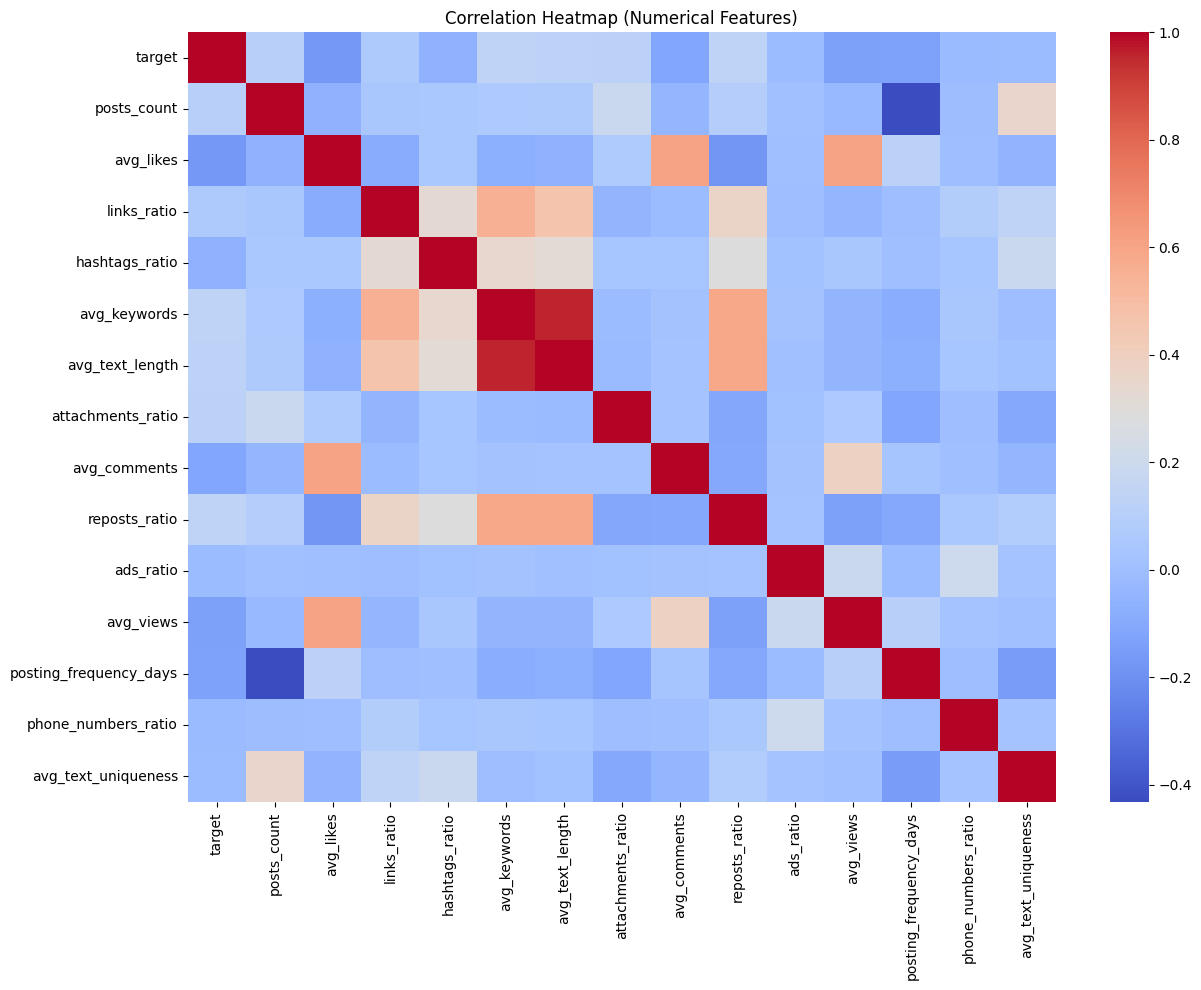

In [20]:
# 3. Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

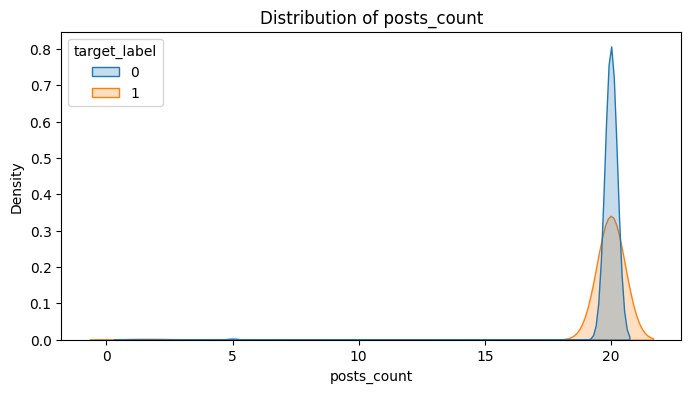

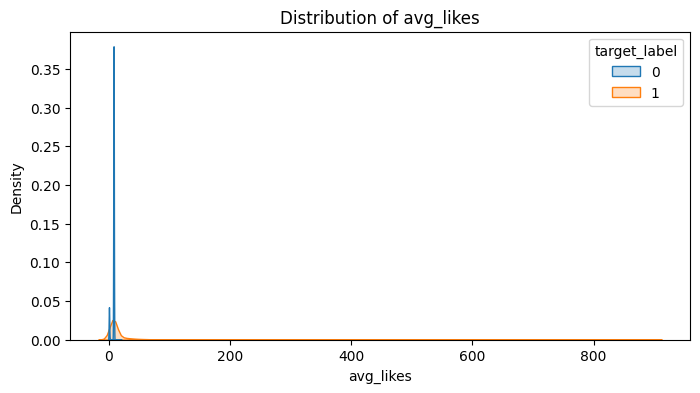

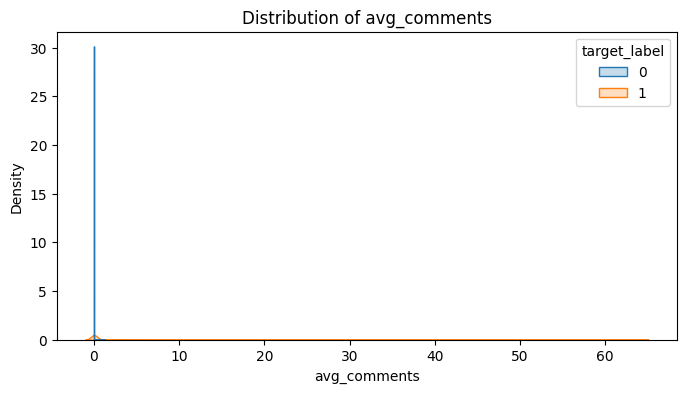

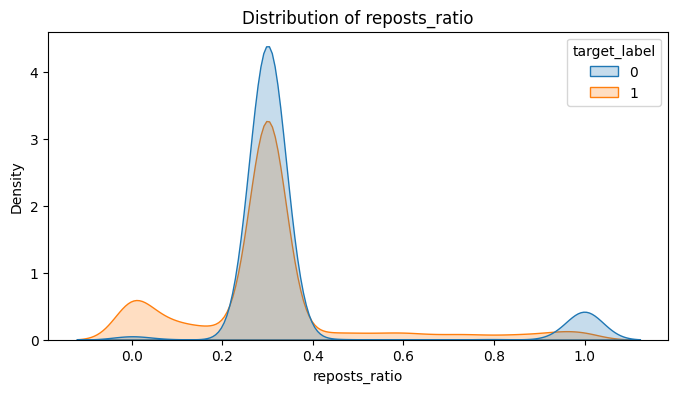

In [21]:
# 4. KDE plots of selected features
features_to_plot = ['posts_count', 'avg_likes', 'avg_comments', 'reposts_ratio']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='target_label', fill=True)
    plt.title(f"Distribution of {feature}")
    plt.show()